## Grouping and summarizing

So far you've been answering questions about individual country-year pairs, but you may be interested in aggregations of the data, such as the average life expectancy of all countries within each year. Here you'll learn to use the group by and summarize verbs, which collapse large datasets into manageable summaries.

### Summarizing the median life expectancy

You've seen how to find the mean life expectancy and the total population across a set of observations, but mean() and sum() are only two of the functions R provides for summarizing a collection of numbers. Here, you'll learn to use the median() function in combination with summarize().

By the way, dplyr displays some messages when it's loaded that we've been hiding so far. They'll show up in red and start with:

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

This will occur in future exercises each time you load dplyr: it's mentioning some built-in functions that are overwritten by dplyr. You won't need to worry about this message within this course.

In [1]:
# Use the median() function within a summarize() to find the median life
# expectancy. Save it into a column called medianLifeExp.

# install packages
# install.packages(dplyr)
# install.packages("gapminder")
# install.packages("ggplot2")
# load packages
library(gapminder)
library(dplyr)
library(ggplot2)

# Summarize to find the median life expectancy
gapminder %>%
    summarize(medianLifeExp = median(lifeExp))

Warning message:
"package 'gapminder' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


medianLifeExp
60.7125


### Summarizing the median life expectancy in 1957
Rather than summarizing the entire dataset, you may want to find 
the median life expectancy for only one particular year. 
In this case, you'll find the median in the year 1957.

In [2]:
# Filter for the year 1957, then use the median() function within 
# a summarize() to calculate the median life expectancy into a 
# column called medianLifeExp.

gapminder %>%
    filter (year == 1957) %>%
    summarize(medianLifeExp = median(lifeExp))

medianLifeExp
48.3605


### Summarizing multiple variables in 1957
The summarize() verb allows you to summarize multiple variables 
at once. In this case, you'll use the median() function to find 
the median life expectancy and the max() function to find the 
maximum GDP per capita.

In [3]:
# Find both the median life expectancy (lifeExp) and the maximum 
# GDP per capita (gdpPercap) in the year 1957, calling them 
# medianLifeExp and maxGdpPercap respectively. You can use the 
# max() function to find the maximum.

gapminder %>%
    filter (year == 1957) %>%
    summarize(medianLifeExp = median(lifeExp), 
              maxGdpPercap = max(gdpPercap))

medianLifeExp,maxGdpPercap
48.3605,113523.1


### Summarizing by year
In a previous exercise, you found the median life expectancy 
and the maximum GDP per capita in the year 1957. 
Now, you'll perform those two summaries within each year 
in the dataset, using the group_by verb.

In [5]:
# The group_by verb 
# Find the median life expectancy (lifeExp) and maximum GDP 
# per capita (gdpPercap) within each year, saving them into 
# medianLifeExp and maxGdpPercap, respectively.

gapminder %>%
    group_by(year) %>%
    summarize(max_gdp = max(gdpPercap),
             median_LifeExp = median(lifeExp))


year,max_gdp,mean_LifeExp
1952,108382.35,45.1355
1957,113523.13,48.3605
1962,95458.11,50.8810
1967,80894.88,53.8250
1972,109347.87,56.5300
1977,59265.48,59.6720
1982,33693.18,62.4415
1987,31540.97,65.8340
1992,34932.92,67.7030
1997,41283.16,69.3940


### Summarizing by continent
You can group by any variable in your dataset to create 
a summary. Rather than comparing across time, you might 
be interested in comparing among continents. You'll want 
to do that within one year of the dataset: let's use 1957.

In [6]:
# Filter the gapminder data for the year 1957. 
# Then find the median life expectancy (lifeExp) and 
# maximum GDP per capita (gdpPercap) within each continent, 
# saving them into medianLifeExp and maxGdpPercap, respectively.

gapminder %>%
    filter (year == 1957) %>%
    group_by(continent) %>%
    summarize(max_gdp = max(gdpPercap),
             median_LifeExp = median(lifeExp))

continent,max_gdp,median_LifeExp
Africa,5487.104,40.5925
Americas,14847.127,56.0740
Asia,113523.133,48.2840
Europe,17909.490,67.6500
Oceania,12247.395,70.2950


### Summarizing by continent and year
Instead of grouping just by year, 
or just by continent, you'll now group 
by both continent and year to summarize within each.

In [7]:
# Find the median life expectancy (lifeExp) and 
# maximum GDP per capita (gdpPercap) within each combination 
# of continent and year, saving them into medianLifeExp and 
# maxGdpPercap, respectively.

gapminder %>%
    group_by(year, continent) %>%
    summarize(medianLifeExp = median(lifeExp),
              maxGdpPercap = max(gdpPercap))

year,continent,medianLifeExp,maxGdpPercap
1952,Africa,38.8330,4725.296
1952,Americas,54.7450,13990.482
1952,Asia,44.8690,108382.353
1952,Europe,65.9000,14734.233
1952,Oceania,69.2550,10556.576
1957,Africa,40.5925,5487.104
1957,Americas,56.0740,14847.127
1957,Asia,48.2840,113523.133
1957,Europe,67.6500,17909.490
1957,Oceania,70.2950,12247.395


### Visualizing median life expectancy over time
In the last chapter, you summarized the gapminder data 
to calculate the median life expectancy within each year. 
Now you can use the ggplot2 package to turn this into 
a visualization of changing life expectancy over time.

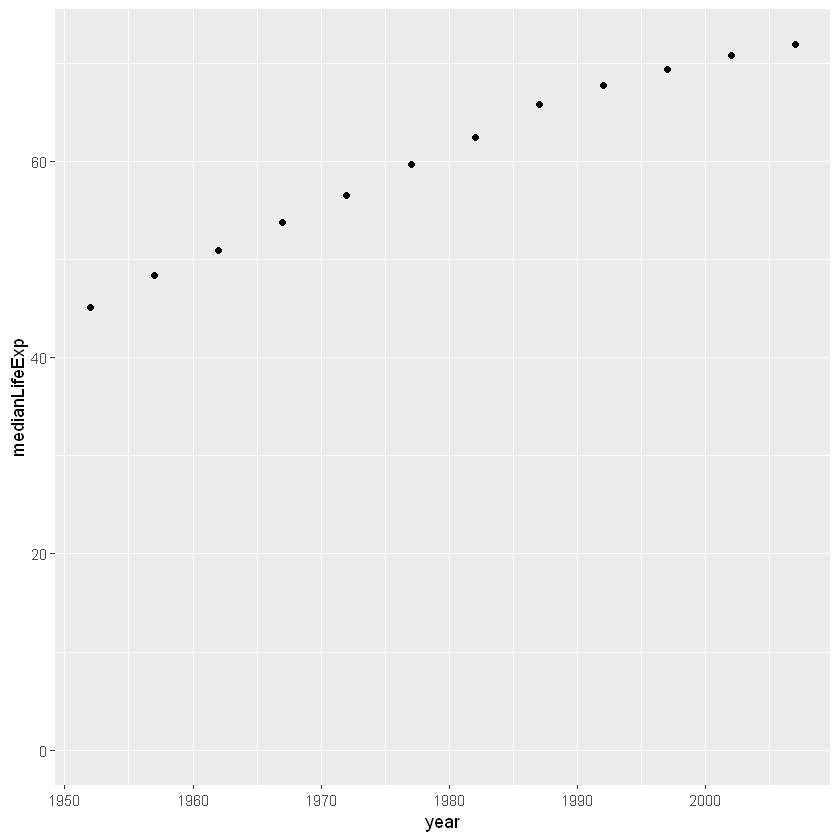

In [8]:
# Visualizing summarized data
# Use the by_year dataset to create a scatter plot showing 
# the change of median life expectancy over time, 
# with year on the x-axis and medianLifeExp on the y-axis. 
# Be sure to add expand_limits(y = 0) to make sure 
# the plot's y-axis includes zero.

by_year <- gapminder %>%
  group_by(year) %>%
  summarize(medianLifeExp = median(lifeExp),
            maxGdpPercap = max(gdpPercap))

# Create a scatter plot showing the change in medianLifeExp over time
ggplot(by_year, aes(x = year, y = medianLifeExp)) + geom_point() + expand_limits(y = 0)


### Visualizing median GDP per capita per continent over time
In the last exercise you were able to see how the median life 
expectancy of countries changed over time. Now you'll examine 
the median GDP per capita instead, and see how the trend 
differs among continents.

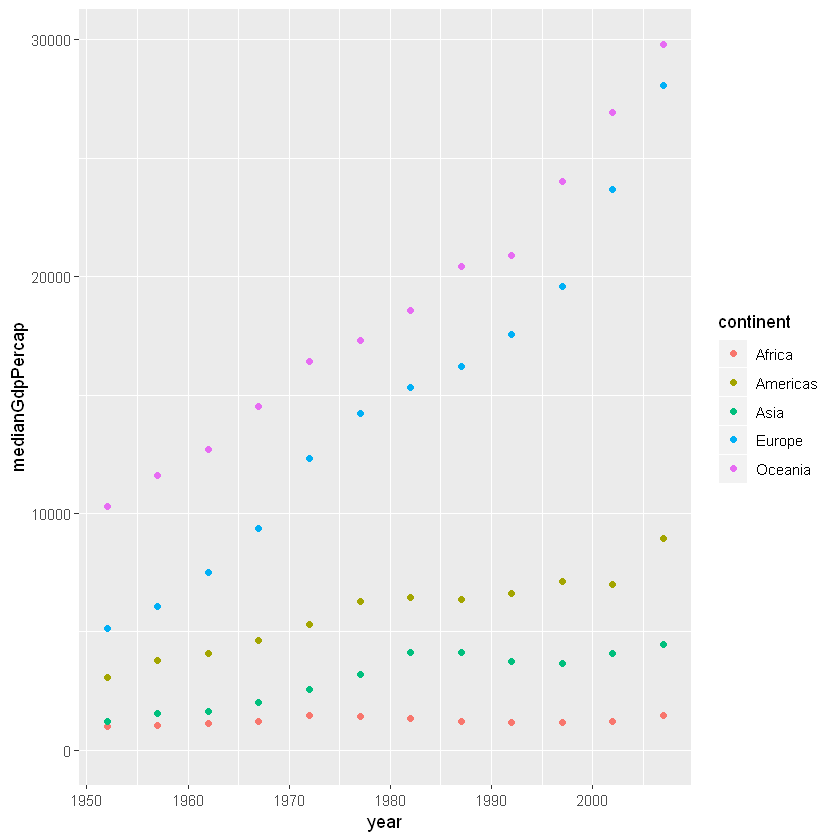

In [11]:
# Summarize the gapminder dataset by continent and year, 
# finding the median GDP per capita (gdpPercap) within 
# each and putting it into a column called medianGdpPercap. 
# Use the assignment operator <- to save this summarized data 
# as by_year_continent.

by_year_continent <- gapminder %>%
  group_by(year, continent) %>%
  summarize(medianGdpPercap = median(gdpPercap))

# Create a scatter plot showing the change in medianGdpPercap 
# by continent over time. Use color to distinguish between 
# continents, and be sure to add expand_limits(y = 0) so that 
# the y-axis starts at zero.

ggplot(by_year_continent, aes(x = year, y = medianGdpPercap, 
                    color = continent)) + geom_point() + expand_limits(y = 0)


### Comparing median life expectancy and median GDP per continent in 2007
In these exercises you've generally created plots 
that show change over time. But as another way of 
exploring your data visually, you can also use ggplot2 
to plot summarized data to compare continents within a 
single year.

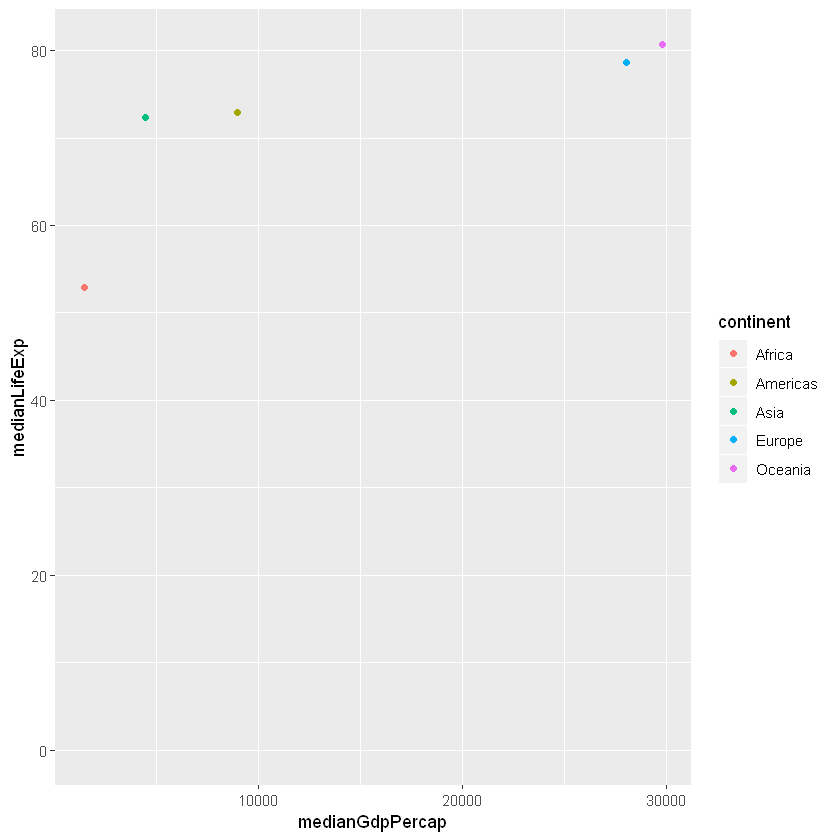

In [14]:
# Filter the gapminder dataset for the year 2007, 
# then summarize the median GDP per capita and the 
# median life expectancy within each continent, 
# into columns called medianLifeExp and medianGdpPercap. 
# Save this as by_continent_2007.

by_continent_2007 <- gapminder %>%
  filter(year == 2007) %>%
  group_by(continent) %>%   
  summarize(medianLifeExp   = median(lifeExp),
            medianGdpPercap = median(gdpPercap))


# Use the by_continent_2007 data to create a scatterplot 
# comparing these summary statistics for continents in 2007, 
# putting the median GDP per capita on the x-axis to the 
# median life expectancy on the y-axis. Color the scatter 
# plot by continent. You don't need to add 
# expand_limits(y = 0) for this plot.

ggplot(by_continent_2007, aes(x = medianGdpPercap, y = medianLifeExp, 
                    color = continent)) + geom_point() + expand_limits(y = 0)
